In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()
df

In [4]:
dataset = pd.DataFrame(df.data)
dataset

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
dataset.columns = df.feature_names
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
dataset['Target'] = df.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
dataset.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Target,0


In [11]:
correlation = dataset.corr()

<Axes: >

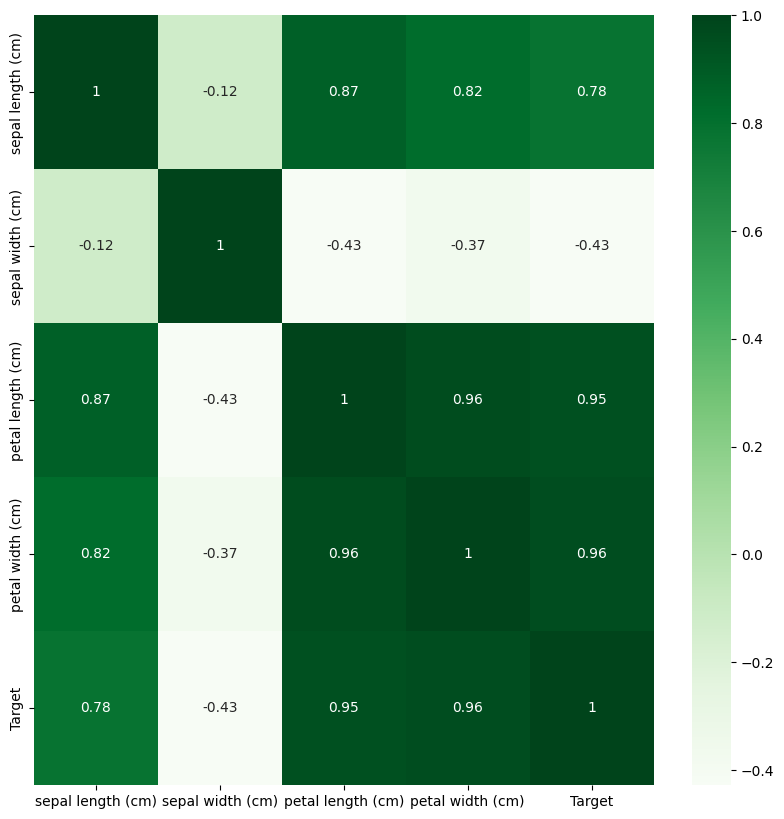

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot = True, cmap = "Greens")

In [13]:
X = dataset.iloc[:,:-1] #independent
Y = dataset.iloc[:,-1] #dependent

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2)

In [15]:
X_train.shape

(112, 4)

In [16]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [17]:
lin.fit(X_train, Y_train)

LinearRegression()

In [18]:
result = lin.predict(X_train)
result

array([ 1.19960764,  1.84689194,  1.35310631,  1.15139026,  2.05425605,
        0.9220383 ,  0.02319916,  1.55101525, -0.08652801,  1.15584775,
       -0.0736135 , -0.064586  , -0.15903447,  1.65317494,  2.01966883,
        1.80971691, -0.04416679,  2.06025346,  2.11427566,  1.98435203,
        1.49118663, -0.07375475,  0.03029173,  1.77932179,  1.18153551,
        1.27295389,  1.9700886 ,  1.5930428 ,  1.09611454,  0.06851058,
        1.27876031, -0.03066628,  2.08332326,  1.08540586,  0.89038576,
       -0.03818649,  0.94050545,  1.29310221,  1.29003948,  1.93683479,
       -0.03123518,  1.40769901,  0.00487326,  1.05873547,  1.99036496,
       -0.07056629,  0.97774327, -0.00929316, -0.02136788, -0.09987176,
        1.83921337,  2.27513779,  0.11518804, -0.14004426,  1.68335051,
        2.17399496,  0.94175897,  2.15484319,  0.93495281,  1.20498481,
        1.75085771, -0.01234037,  1.77556053,  1.6956774 ,  1.73626204,
        0.04752247,  1.82017572, -0.04694312, -0.05360643,  0.85

In [19]:
from sklearn import metrics

In [20]:
score = metrics.r2_score(Y_train,result)
score

0.9292786767936847

In [21]:
score_1 = metrics.mean_absolute_error(Y_train,result)
score_1

0.16459160785603316